- feature: pclass, sex, fare
- label: survived

1. 1등급, female, 32달러 인경우 생사유무를 예측하시요
( voting , bagging, boost, deep learning 을 이용하시요) 
2. 위의 모델의 train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier,RandomForestClassifier, AdaBoostClassifier 
from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
x_data = titanic[['pclass', 'sex', 'fare']]
y_data = titanic['survived']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.2,
                                                   random_state = 1, stratify = y_data)

In [5]:
myt = make_column_transformer( (OneHotEncoder(),['sex']),remainder='passthrough')
ss=StandardScaler(['pclass','fare'])

## 1번.1등급, female, 32달러 인경우 생사유무를 예측하시요 ( voting , bagging, boost, deep learning 을 이용하시요) 

In [8]:
model_logi = make_pipeline(myt,ss,LogisticRegression())
model_knn = make_pipeline(myt,ss,KNeighborsClassifier())
model_tree = make_pipeline(myt,ss,DecisionTreeClassifier())

In [9]:
# VotingClassifier

model_vote = VotingClassifier(estimators = [('bagg',model_logi),('ada',model_knn),('mlp',model_tree)],voting='soft')
model_vote.fit(x_train,y_train)

xd = pd.DataFrame([[1,'female', 32]], columns = x_data.columns)
model_vote.predict(xd)

array([1], dtype=int64)

In [10]:
# BaggingClassifier

model_bagg = make_pipeline(myt,ss,BaggingClassifier())
model_bagg.fit(x_train,y_train)

xd = pd.DataFrame([[1,'female', 32]], columns = x_data.columns)
model_bagg.predict(xd)

array([1], dtype=int64)

In [11]:
# AdaBoostClassifier

model_ada = make_pipeline(myt,ss,AdaBoostClassifier())
model_ada.fit(x_train,y_train)

xd = pd.DataFrame([[1,'female', 32]], columns = x_data.columns)
model_ada.predict(xd)

array([1], dtype=int64)

In [12]:
# MLPClassifier

model_mlp = make_pipeline(myt,ss,MLPClassifier())
model_mlp.fit(x_train,y_train)

xd = pd.DataFrame([[1,'female', 32]], columns = x_data.columns)
model_mlp.predict(xd)

array([1], dtype=int64)

##  2번 위의 모델의 train, test, f1 score 를 구하시요

In [13]:
# VotingClassifier

print('VotingClassifier Train Score : ', model_vote.score(x_train,y_train))

print('VotingClassifier Test Score : ', model_vote.score(x_test,y_test))

print('VotingClassifier F1 Score : ', f1_score(y_test, model_vote.predict(x_test)))

VotingClassifier Train Score :  0.8974719101123596
VotingClassifier Test Score :  0.8324022346368715
VotingClassifier F1 Score :  0.7727272727272727


In [14]:
# BaggingClassifier

print('BaggingClassifier Train Score : ', model_bagg.score(x_train,y_train))

print('BaggingClassifier Test Score : ', model_bagg.score(x_test,y_test))

print('BaggingClassifier F1 Score : ', f1_score(y_test, model_bagg.predict(x_test)))

BaggingClassifier Train Score :  0.9002808988764045
BaggingClassifier Test Score :  0.8379888268156425
BaggingClassifier F1 Score :  0.7819548872180452


In [15]:
# AdaBoostClassifier

print('AdaBoostClassifier Train Score : ', model_ada.score(x_train,y_train))

print('AdaBoostClassifier Test Score : ', model_ada.score(x_test,y_test))

print('AdaBoostClassifier F1 Score : ', f1_score(y_test, model_bagg.predict(x_test)))

AdaBoostClassifier Train Score :  0.8258426966292135
AdaBoostClassifier Test Score :  0.8268156424581006
AdaBoostClassifier F1 Score :  0.7819548872180452


In [16]:
# MLPClassifier

print('MLPClassifier Train Score : ', model_mlp.score(x_train,y_train))

print('MLPClassifier Test Score : ', model_mlp.score(x_test,y_test))

print('MLPClassifier F1 Score : ', f1_score(y_test, model_mlp.predict(x_test)))

MLPClassifier Train Score :  0.8019662921348315
MLPClassifier Test Score :  0.8324022346368715
MLPClassifier F1 Score :  0.761904761904762


##  3번 confusion matrix 를 구하고 heatmap 을 그리시요.

<function matplotlib.pyplot.show(close=None, block=None)>

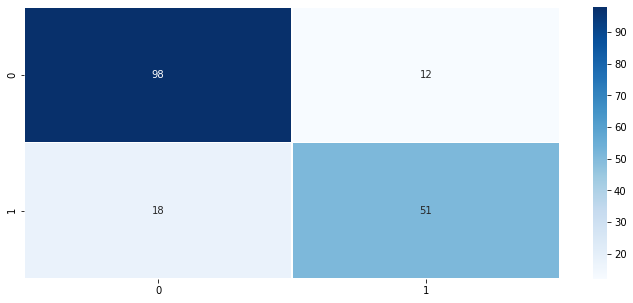

In [17]:
# VotingClassifier
predict = model_vote.predict(x_test)

cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(12,5))
sns.heatmap(cm, annot=True, linewidth=0.1,cmap='Blues')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

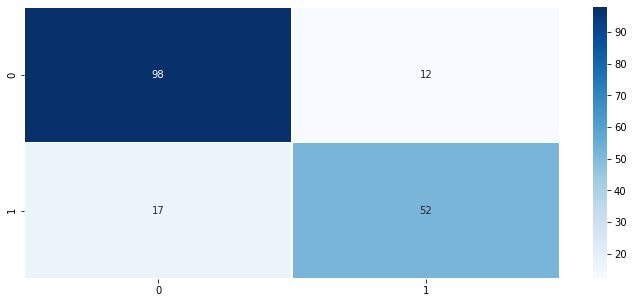

In [18]:
# BaggingClassifier

predict = model_bagg.predict(x_test)

cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(12,5))
sns.heatmap(cm, annot=True, linewidth=0.1,cmap='Blues')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

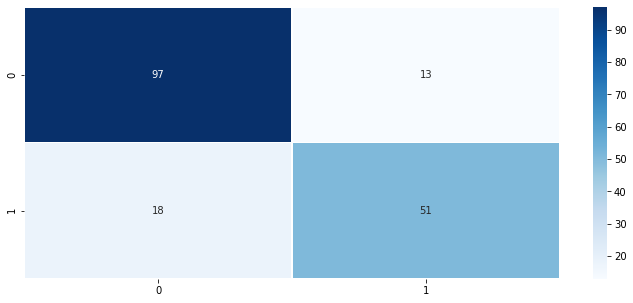

In [19]:
# AdaBoostClassifier
predict = model_ada.predict(x_test)

cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(12,5))
sns.heatmap(cm, annot=True, linewidth=0.1,cmap='Blues')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

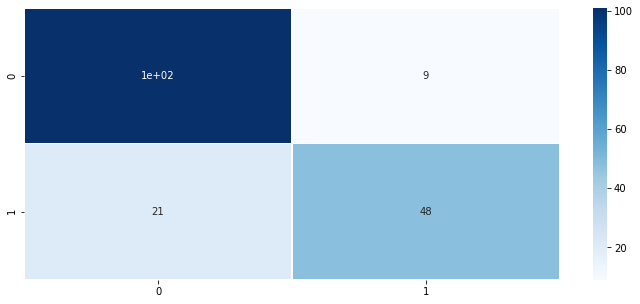

In [20]:
# MLPClassifier
predict = model_mlp.predict(x_test)

cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(12,5))
sns.heatmap(cm, annot=True, linewidth=0.1,cmap='Blues')
plt.show

##  4번 roc curve 를 그리시요.

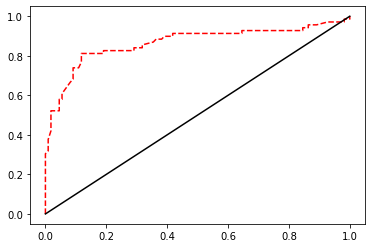

In [21]:
# VotingClassifier
proba = model_vote.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test,proba[:,1])

plt.plot(fpr, tpr,'r--')
plt.plot([0,1],[0,1], 'k')
plt.show()

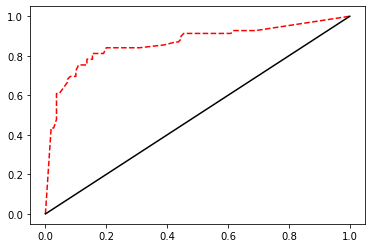

In [22]:
# BaggingClassifier

proba = model_bagg.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test,proba[:,1])

plt.plot(fpr, tpr,'r--')
plt.plot([0,1],[0,1], 'k')
plt.show()

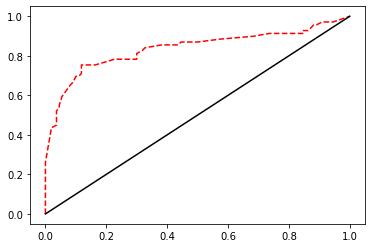

In [23]:
# AdaBoostClassifier
proba = model_ada.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test,proba[:,1])

plt.plot(fpr, tpr,'r--')
plt.plot([0,1],[0,1], 'k')
plt.show()

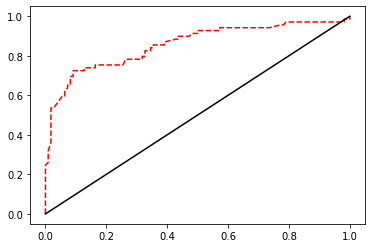

In [24]:
# MLPClassifier
proba = model_mlp.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test,proba[:,1])

plt.plot(fpr, tpr,'r--')
plt.plot([0,1],[0,1], 'k')
plt.show()